In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import nltk
import os
import sys


# preparing training dataset

In [3]:
dict = pd.read_csv('dictionary.txt',sep='|',header=None)
dict.columns = ["phrase", "id"]
dict = dict.set_index("id")

dict

,phrase
id,
0,!
22935,! '
18235,! ''
179257,! Alas
22936,! Brilliant
...,...
220441,zoning ordinances to protect your community fr...
179256,zzzzzzzzz
220442,élan


In [4]:
sentiment_labels = pd.read_csv('sentiment_labels.txt',sep='|')
sentiment_labels.columns=["id", "sentiment"]
sentiment_labels = sentiment_labels.set_index("id")
sentiment_labels

,sentiment
id,
0,0.50000
1,0.50000
2,0.44444
3,0.50000
4,0.42708
...,...
239227,0.36111
239228,0.38889
239229,0.33333


In [5]:
phrase_sentiments = dict.join(sentiment_labels)
phrase_sentiments

,phrase,sentiment
id,,
0,!,0.50000
22935,! ',0.52778
18235,! '',0.50000
179257,! Alas,0.44444
22936,! Brilliant,0.86111
...,...,...
220441,zoning ordinances to protect your community fr...,0.13889
179256,zzzzzzzzz,0.19444
220442,élan,0.51389


In [6]:
def group_labels(label):
        if label in ["very negative", "negative"]:
            return "negative"
        elif label in ["positive", "very positive"]:
            return "positive"
        else:
            return "neutral"

In [7]:
phrase_sentiments["fine"] = pd.cut(phrase_sentiments.sentiment, [0, 0.2, 0.4, 0.6, 0.8, 1.0],
                                           include_lowest=True,
                                           labels=["very negative", "negative", "neutral", "positive", "very positive"])
phrase_sentiments["coarse"] = phrase_sentiments.fine.apply(group_labels)

In [8]:
#import dataset sentences
sentences = pd.read_csv('datasetSentences.txt',sep='\t',index_col='sentence_index')
sentences

,sentence
sentence_index,
1,The Rock is destined to be the 21st Century 's...
2,The gorgeously elaborate continuation of `` Th...
3,Effective but too-tepid biopic
4,If you sometimes like to go to the movies to h...
5,"Emerges as something rare , an issue movie tha..."
...,...
11851,A real snooze .
11852,No surprises .
11853,We 've seen the hippie-turned-yuppie plot befo...


In [9]:
splits =  pd.read_csv('datasetSplit.txt',index_col='sentence_index')
splits

,splitset_label
sentence_index,
1,1
2,1
3,2
4,2
5,2
...,...
11851,1
11852,1
11853,1


In [10]:
sentence_partitions=sentences.join(splits).set_index("sentence")
sentence_partitions

,splitset_label
sentence,
"The Rock is destined to be the 21st Century 's new `` Conan '' and that he 's going to make a splash even greater than Arnold Schwarzenegger , Jean-Claud Van Damme or Steven Segal .",1
The gorgeously elaborate continuation of `` The Lord of the Rings '' trilogy is so huge that a column of words can not adequately describe co-writer\/director Peter Jackson 's expanded vision of J.R.R. Tolkien 's Middle-earth .,1
Effective but too-tepid biopic,2
"If you sometimes like to go to the movies to have fun , Wasabi is a good place to start .",2
"Emerges as something rare , an issue movie that 's so honest and keenly observed that it does n't feel like one .",2
...,...
A real snooze .,1
No surprises .,1
"We 've seen the hippie-turned-yuppie plot before , but there 's an enthusiastic charm in Fire that makes the formula fresh again .",1


In [11]:
 data = phrase_sentiments.join(sentence_partitions, on="phrase")

In [12]:
data

,phrase,sentiment,fine,coarse,splitset_label
id,,,,,
0,!,0.50000,neutral,neutral,NaN
22935,! ',0.52778,neutral,neutral,NaN
18235,! '',0.50000,neutral,neutral,NaN
179257,! Alas,0.44444,neutral,neutral,NaN
22936,! Brilliant,0.86111,very positive,positive,NaN
...,...,...,...,...,...
220441,zoning ordinances to protect your community fr...,0.13889,very negative,negative,NaN
179256,zzzzzzzzz,0.19444,very negative,negative,NaN
220442,élan,0.51389,neutral,neutral,NaN


In [13]:
data["splitset_label"] = data["splitset_label"].fillna(1).astype(int)

In [14]:
data["phrase"] = data["phrase"].str.replace(r"\s('s|'d|'re|'ll|'m|'ve|n't)\b", lambda m: m.group(1))
data

,phrase,sentiment,fine,coarse,splitset_label
id,,,,,
0,!,0.50000,neutral,neutral,1
22935,! ',0.52778,neutral,neutral,1
18235,! '',0.50000,neutral,neutral,1
179257,! Alas,0.44444,neutral,neutral,1
22936,! Brilliant,0.86111,very positive,positive,1
...,...,...,...,...,...
220441,zoning ordinances to protect your community fr...,0.13889,very negative,negative,1
179256,zzzzzzzzz,0.19444,very negative,negative,1
220442,élan,0.51389,neutral,neutral,1


In [15]:
partition = data.groupby("splitset_label")

In [16]:
partition

In [17]:
for splitset, partition in partition:
       split_name = {1: "train", 2: "test", 3: "dev"}[splitset]
       filename = ("stanford-sentiment-treebank.%s.csv" % split_name)
       del partition["splitset_label"]
       partition.to_csv(filename)

In [18]:
train = pd.read_csv('stanford-sentiment-treebank.train.csv')

In [19]:
test = pd.read_csv('stanford-sentiment-treebank.test.csv')

In [20]:
dev = pd.read_csv('stanford-sentiment-treebank.dev.csv')

In [21]:
train.head()

,id,phrase,sentiment,fine,coarse
0,0,!,0.50000,neutral,neutral
1,22935,! ',0.52778,neutral,neutral
2,18235,! '',0.50000,neutral,neutral
3,179257,! Alas,0.44444,neutral,neutral
4,22936,! Brilliant,0.86111,very positive,positive


In [22]:
train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,236077.0,119769.724577,68963.638225,0.0,60371.00000,119389.0,179717.00000,239231.0
sentiment,236077.0,0.513022,0.174044,0.0,0.41667,0.5,0.61111,1.0


In [23]:
# count missing values and print percentage
count = train.isnull().sum().sort_values(ascending=False)
percentage = ((train.isnull().sum()/len(train)*100)).sort_values(ascending=False)
missing_data = pd.concat([count,percentage],axis=1)
keys = (['count','percentage'])

print("count and percentage of missing data:")
missing_data

count and percentage of missing data:


,0,1
coarse,0,0.0
fine,0,0.0
sentiment,0,0.0
phrase,0,0.0
id,0,0.0


     No, missing values.

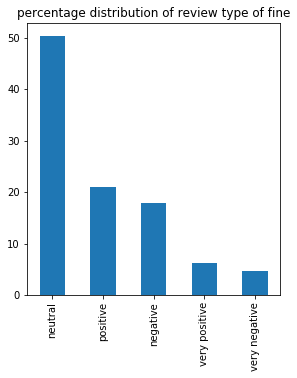

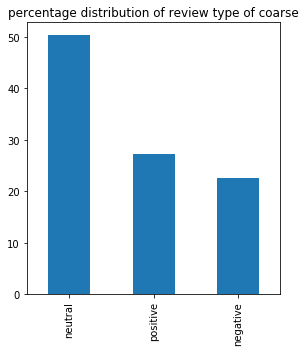

In [24]:
# checking for distribution of default
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
# print(round(train.fine.value_counts(normalize=True)*100,2))
round(train.fine.value_counts(normalize=True)*100,2).plot(kind='bar')
plt.title('percentage distribution of review type of fine')
plt.show()
plt.figure(figsize=(10,5))
plt.subplot(1,2,2)
# print(round(train.fine.value_counts(normalize=True)*100,2))
round(train.coarse.value_counts(normalize=True)*100,2).plot(kind='bar')
plt.title('percentage distribution of review type of coarse')
plt.show()

In [25]:
df = train[["phrase"]]
df["phrase"] = df["phrase"].astype(str)
df

,phrase
0,!
1,! '
2,! ''
3,! Alas
4,! Brilliant
...,...
236072,zoning ordinances to protect your community fr...
236073,zzzzzzzzz
236074,élan
236075,É


In [26]:
# apply first level cleaning
import re
import string

#removing punctuations,numbers square brackets.

def text_clean(text):
    text = text.lower() 
    text = re.sub('\[.*?\]','',text)
    text = re.sub('[%s]'%re.escape(string.punctuation),'',text)
    text = re.sub('\w*\d\w*','',text)
    text =re.sub('[''""_]','',text)
    text = re.sub('\n','',text)
    text =re.sub('[é]','',text)
    return text

cleaned = lambda x :text_clean(x)

df["clean_text"]=pd.DataFrame(df.phrase.apply(cleaned))




In [27]:
df.head(5)

,phrase,clean_text
0,!,
1,! ',
2,! '',
3,! Alas,alas
4,! Brilliant,brilliant


In [28]:
# cleaning test data
df_test = test[["phrase"]]
df_test["phrase"] = df_test["phrase"].astype(str)

def text_clean(text):
    text = text.lower() 
    text = re.sub('\[.*?\]','',text)
    text = re.sub('[%s]'%re.escape(string.punctuation),'',text)
    text = re.sub('\w*\d\w*','',text)
    text =re.sub('[''""_]','',text)
    text = re.sub('\n','',text)
    text =re.sub('[é]','',text)
    return text

cleaned = lambda x :text_clean(x)

df_test["clean_text"]=pd.DataFrame(df_test.phrase.apply(cleaned))

df_test.head()

,phrase,clean_text
0,"-LRB- A -RRB- rare , beautiful film .",lrb a rrb rare beautiful film
1,-LRB- Drumline -RRB- is entertaining for what ...,lrb drumline rrb is entertaining for what it d...
2,-LRB- Schweiger is -RRB- talented and terribly...,lrb schweiger is rrb talented and terribly cha...
3,-LRB- Wendigo is -RRB- why we go to the cinema...,lrb wendigo is rrb why we go to the cinema to...
4,... Blade II is more enjoyable than the origin...,blade ii is more enjoyable than the original


In [124]:
x = df["clean_text"]
y = train["coarse"]

X_test = df_test["clean_text"]

#  spl

In [125]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.1,random_state=300)

In [126]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [127]:

from sklearn.linear_model import LogisticRegression

tvec = TfidfVectorizer()
lr= LogisticRegression(solver="lbfgs")

from sklearn.pipeline import Pipeline
model = Pipeline([('vectorizer',tvec),('classifier',lr)])
model.fit(x_train,y_train)

Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                ('classifier', LogisticRegression())])

In [128]:
predict = model.predict(x_test)


In [129]:
list(predict)

['positive',
 'neutral',
 'positive',
 'neutral',
 'neutral',
 'negative',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'negative',
 'negative',
 'negative',
 'neutral',
 'neutral',
 'neutral',
 'positive',
 'negative',
 'neutral',
 'neutral',
 'neutral',
 'positive',
 'neutral',
 'negative',
 'neutral',
 'positive',
 'neutral',
 'positive',
 'positive',
 'neutral',
 'negative',
 'positive',
 'positive',
 'negative',
 'negative',
 'positive',
 'positive',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'positive',
 'negative',
 'neutral',
 'negative',
 'positive',
 'neutral',
 'neutral',
 'positive',
 'neutral',
 'neutral',
 'negative',
 'positive',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'positive',
 'negative',
 'negative',
 'neutral',
 'neutral',
 'positive',
 'positiv

In [130]:
# prediction for test dataset
predictions = model.predict(X_test)
df_test["predictions"]=list(predictions)
df_test

,phrase,clean_text,predictions
0,"-LRB- A -RRB- rare , beautiful film .",lrb a rrb rare beautiful film,positive
1,-LRB- Drumline -RRB- is entertaining for what ...,lrb drumline rrb is entertaining for what it d...,positive
2,-LRB- Schweiger is -RRB- talented and terribly...,lrb schweiger is rrb talented and terribly cha...,positive
3,-LRB- Wendigo is -RRB- why we go to the cinema...,lrb wendigo is rrb why we go to the cinema to...,neutral
4,... Blade II is more enjoyable than the origin...,blade ii is more enjoyable than the original,positive
...,...,...,...
2120,the plot is so amusingly contrived and outland...,the plot is so amusingly contrived and outland...,negative
2121,"the story itself is uninteresting , and the so...",the story itself is uninteresting and the son...,negative
2122,"very solid , very watchable first feature for ...",very solid very watchable first feature for d...,positive
2123,well worth the time .,well worth the time,positive


In [131]:
from sklearn.metrics import accuracy_score,precision_score,recall_score
print('Accuracy score:',accuracy_score(predict,y_test))
print('Precision score:',precision_score(predict,y_test,average='weighted'))
print('Recall:',precision_score(predict,y_test,average='weighted'))

Accuracy score: 0.7331836665537106
Precision score: 0.7547481913176244
Recall: 0.7547481913176244


# scraped amazon reviews

In [132]:
df1 = pd.read_excel('scraped_data.xlsx',sheet_name='One_Plus_7T', index_col=[0])
df2 = pd.read_excel('scraped_data.xlsx',sheet_name='Samsung_galaxy_M31', index_col=[0])
df3 = pd.read_excel('scraped_data.xlsx',sheet_name='Apple_iphone11', index_col=[0])
df4 = pd.read_excel('scraped_data.xlsx',sheet_name='oppo_F17', index_col=[0])
df5 = pd.read_excel('scraped_data.xlsx',sheet_name='Vivo_V19', index_col=[0])
df6 = pd.read_excel('scraped_data.xlsx',sheet_name='Nokia_6.2', index_col=[0])
df7 = pd.read_excel('scraped_data.xlsx',sheet_name='LG_G8X', index_col=[0])
df8 = pd.read_excel('scraped_data.xlsx',sheet_name='Honor_20', index_col=[0])
df9 = pd.read_excel('scraped_data.xlsx',sheet_name='Redmi_9A', index_col=[0])
df10 = pd.read_excel('scraped_data.xlsx',sheet_name='OnePlus_6T_McLaren', index_col=[0])


# prediction of reviews

In [161]:
Ist = list(model.predict(df1["Review_Content"]))
df1['prediction'] = list(Ist)
df1

,Customer_Name,Review_Content,prediction
0,Praggya,After reading a lot of geeky reviews on YouT...,negative
1,Amazon Customer,Detailed review --Design - 4/5+Reduced notch...,positive
2,Kshitij Kumar,Awesome experience..best in class camera... ...,positive
3,manikanta,I received One Plus 7T 2 days back. I will d...,positive
4,Vicky Sen,My first one+7t & its make me so sad. I rece...,negative
5,Rajesh Adhikary,"This phone has great performance, good camer...",positive
6,KESH,THIS IS ONE OF THE WORST PHONE I HAVE EVER P...,negative
7,Dheeraj Malhotra,No earphone jack,neutral
8,Avengers,A One plus user.Oneplus One -> Oneplus 3T ->...,positive
9,Nitish Kumar,The smart Lock feature is not working on the...,negative


In [162]:
II = list(model.predict(df2["Review_Content"]))
df2['prediction'] = list(II)
df2

,Customer_Name,Review_Content,prediction
0,shailesh,"Best camera, very good battery life, eat bod...",positive
1,Ajay KS,This is best thing you can get at this price...,positive
2,surojit das,3rd class front camera. 32 MP front camera n...,neutral
3,Riddham Jain,Lets just begin with the obvious. This phone...,negative
4,Anshul,"I am using it from 3 days , 6000 mah battery...",negative
5,Abhinav,The phone was wrapped in dust. Although it w...,negative
6,abin abraham,"Software is no working. No sounds in media, ...",negative
7,Akshaykumar Patil,"Phone camera is not good , samsung says it's...",negative
8,Veerababu Puli,"Camera front is worst, not up to the mark. W...",negative
9,TUSHAR GOMASE,Not a Samsung performance. It seems it was l...,negative


In [163]:
III = list(model.predict(df3["Review_Content"]))
df3['prediction'] = list(III)
df3

,Customer_Name,Review_Content,prediction
0,Suman Biswas,May be my first negative review about the pr...,negative
1,Neha,Please do not buy expensive product like iph...,negative
2,shanu Kumar,Awesome Phone. Nice upgrade from iPhone 6s t...,positive
3,Sunny Kumar,The iPhone design is good and the camera qua...,positive
4,Amazon Customer,My Phone is Producing Too Much Heat Even Did...,negative
5,Krusshna,Bought the mobile from appario retail ltd. M...,negative
6,Satyapal singh,"Defective product,got heat up within 5 minut...",negative
7,Gurmeet singh,The product i got was defective . The face i...,negative
8,Ghar Sayan,"In my opinion, don’t think much about the p...",positive
9,Masood Ansari,I purchased an iphone 11 from this seller on...,neutral


In [164]:
IV = list(model.predict(df4["Review_Content"]))
df4['prediction'] = list(IV)
df4

,Customer_Name,Review_Content,prediction
0,Shajesh,This review's to all those who were eagerly ...,negative
1,Utkarsh,"i like the camera quality, images and videos...",positive
2,Anup roy,"Hi, I am writing this review after 3 days of...",positive
3,Uday Girish,So it's been three days since I'm using this...,positive
4,Abhishek Soharia,1st Buyer of OPPO F17Awssm back leather and...,positive
5,INTELLIGENCE INDIAN,There is no inbuilt call recording&there is ...,negative
6,Abhishek singh,Hi I got this phone 24 sept morning .phone i...,negative
7,mohammed kashif,"CLASSY PHONE FOR CLASSY PEOPLE, IF U LIVE A ...",negative
8,Ahmed,It is nice phone but it is little bit higher...,neutral
9,vishnu,It's not worth for this amount after Unboxin...,negative


In [165]:
V = list(model.predict(df5["Review_Content"]))
df5['prediction'] = list(V)
df5

,Customer_Name,Review_Content,prediction
0,Arjun,Very bad product don't buy 😢,negative
1,Soumyaranjan Nanda,Superb phone 👍👌 light weight and have a prem...,positive
2,Inamul Hoque,Price is too much high,neutral
3,Hiren Rathod,After 1 month Use1.Look and Build quality Go...,positive
4,Yam k,Superb one the best in vivo Mobile's v19 su...,positive
5,MUKESH KUMAR MEENA,Nice mobile but price so high,positive
6,Manoj Nayak,Expect Price.... Everything Is PerfectA Beau...,positive
7,Madan Lal,Super mobile phone,neutral
8,Rupinderdeep singh,Awesome phone at this price.Battery back up ...,positive
9,vignesh,"This phone is not worth for 28k, performance...",negative


In [166]:
VI = list(model.predict(df6["Review_Content"]))
df6['prediction'] = list(VI)
df6

,Customer_Name,Review_Content,prediction
0,Darshan,Ultimate mid range mobile from Nokia. Excell...,positive
1,DHEERAJ GUPTA,Poor quality control. My phone is having scr...,negative
2,Sonu keswani,Price is tooo high,positive
3,Vijay,Worst camera performance and Battery drain r...,negative
4,Shriram Fowkar,In the sale for exchange you get Rs. 2000/- ...,positive
5,Amazon Customer,Very very bad camera and worst battery don't...,negative
6,Rohitash Garhwal,Worst service and worst product. Now I feel ...,negative
7,Mandeep kr Gayan,Price is high,positive
8,Mukesh kumar sahu,Awesome thanks to Amazon,positive
9,Manivannan,Mid range mobile with awesome display with H...,positive


In [167]:
VII = list(model.predict(df7["Review_Content"]))
df7['prediction'] = list(VII)
df7

,Customer_Name,Review_Content,prediction
0,Sakshi,Aswome premium experience.CAMERA Both Back a...,positive
1,Gaurav,"So, I'll say this outright, I am not a big s...",negative
2,Ajay,"My 1st LG Phone, Finalized it the moment I s...",negative
3,Devansh aggarwal,Amazing for playing games and office work,positive
4,Ishaan,Pros:1. Excellent build quality with water r...,positive
5,Prakash,"I have lg g6 worth rs 40,000.00 but lg give ...",neutral
6,RookieRon,After 1 month of use the Hinge is of the lo...,negative
7,mac,LG G8x is true value for money. considering ...,negative
8,Piyush SAHA,Super phone star of the new year,neutral
9,Abhimanyu Singh,I was looking to buy a new phone for quite s...,negative


In [168]:
VIII = list(model.predict(df8["Review_Content"]))
df8['prediction'] = list(VIII)
df8

,Customer_Name,Review_Content,prediction
0,abhinav arya,I bought this phone at a price of 23k. Here ...,positive
1,Shrinidhi Yeri,Edited on November 9Using the phone since 10...,positive
2,Imran,Using this mobile for a week now I must say ...,positive
3,Xavr,Pros..... An awesome phone for the price you...,positive
4,rahul kumar,Super duper honer.,neutral
5,Abhinav,Except the fact that the OS on this phone ne...,negative
6,Atanu Kundu,If I have to tell in one word about this pho...,negative
7,pavanraj,One plus n iPhone 11 got a great competition...,positive
8,Binal Parmar,The mobile has worst network connectivity. I...,negative
9,RISHI KUMAR,The mobile have super fast perfomance and th...,positive


In [169]:
IX = list(model.predict(df9["Review_Content"]))
df9['prediction'] = list(IX)
df9

,Customer_Name,Review_Content,prediction
0,suresh.s,Hello. The Redmi 9 A phone I bought is fine....,negative
1,Soumya,Both 13 MP and 5MP Camera quality is good. H...,positive
2,Deepak chandra joshi,If you are looking for low budget phone this...,positive
3,Sagar,Made in China product,neutral
4,VISAL V,Made in china...The country of origin should...,neutral
5,Amazon Customer,Good battery. But phone hangs a.lot. need to...,neutral
6,Sawroop,Do not go for it...First mobile from Redmi w...,neutral
7,Vijay Pednekar,"Nice phone, looks pretty.good backup of batt...",positive
8,sumit anwekar,Lovely low budget mobile love u redmi nice l...,positive
9,Sufiyan Ali khan,Worst camera ever...both front & back... & S...,negative


In [170]:
X = list(model.predict(df10["Review_Content"]))
df10['prediction'] = list(X)
df10

,Customer_Name,Review_Content,prediction
0,Tanmay Shukla,I got this phone on Friday evening.Pros:Grea...,positive
1,Surbhi Garg,Camera quality is not upto the mark. I visit...,negative
2,klknow,I charged the phone completely out of the bo...,negative
3,abdulkadir garari,One plus 6 was costing 28k during the big bi...,positive
4,Anshu K.,Good build.amazing battery life. ( Minimum 3...,positive
5,nagaraj s.,Phone is simply superb in all aspects...low ...,positive
6,Regidi Mahesh Dora,Two days back I received 6T and had many pro...,negative
7,Vaibhav Narvaria,After replace the handset issue was resolved...,neutral
8,Aakash Sinha,This has by far been the best phone I have e...,positive
9,Mumtaz Alam,Battery-Extremely PoorCamera-SatisfactoryLoo...,negative


In [173]:
writer = pd.ExcelWriter(r'C:\Users\pooja\predictions.xlsx', engine='xlsxwriter')
df1.to_excel(writer,sheet_name='One_Plus_7T')
df2.to_excel(writer,sheet_name='Samsung_galaxy_M31')
df3.to_excel(writer,sheet_name='Apple_iphone11')
df4.to_excel(writer,sheet_name='oppo_F17')
df5.to_excel(writer,sheet_name='Vivo_V19')
df6.to_excel(writer,sheet_name='Nokia_6.2')
df7.to_excel(writer,sheet_name='LG_G8X')
df8.to_excel(writer,sheet_name='Honor_20')
df9.to_excel(writer,sheet_name='Redmi_9A')
df10.to_excel(writer,sheet_name='OnePlus_6T_McLaren')
writer.save()